<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r8_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-normal-n-0-6-9-15-r8.csv?token=AKVFSOAYSXLFOGVSI3L7UG264IBYO')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-malicious-n-0-6-9-15-m-1-11-r8.csv?token=AKVFSOCCT7PUFPUONDFBOKS64IBYU')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,88,0,3,1,1,4,3,9,6,6,24,8,5,3,3,1.0,16,51,1,51,51,0,20,3,27,1
1,88,0,3,1,1,4,3,9,6,6,24,8,7,3,3,1.0,16,58,1,58,58,0,28,3,27,0
2,110,0,2,1,1,4,3,9,11,11,24,8,8,3,3,1.0,16,57,2,58,114,0,32,3,27,0
3,118,0,1,1,1,4,3,9,15,15,24,8,6,4,4,1.0,20,50,2,51,100,0,24,3,27,1
4,126,2,0,4,1,1,5,17,24,8,6,6,5,3,0,0.0,4,49,3,51,147,0,20,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211167,3277986,2,0,4,5,3,5,19,24,8,15,15,60206,4,0,0.0,12,1,26,26,26,0,3612360,20,380,0
211168,3279286,0,2,6,1,1,3,9,27,11,24,8,60219,3,3,1.0,16,4,1,4,4,0,361314,18,162,0
211169,3279293,0,2,6,2,2,3,9,27,11,24,8,60219,3,3,1.0,23,3,2,4,6,0,1445256,18,162,0
211170,3279300,0,2,6,3,2,3,9,27,11,24,8,60219,3,3,1.0,30,2,3,4,6,0,2167884,18,162,0


In [6]:
df.shape

(211172, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-malicious-n-0-6-9-15-m-1-12-r8.csv?token=AKVFSOEZEP3GBKUQVWOE5YS64IBYY')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-malicious-n-0-6-9-15-m-1-7-r8.csv?token=AKVFSOBXLJSNDFVPS5OKRX264IBY6')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-malicious-n-0-6-9-15-m-11-12-r8.csv?token=AKVFSOFWAL5BIHKMMLLP6PK64IBZA')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-malicious-n-0-6-9-15-m-7-11-r8.csv?token=AKVFSOGP5X53F3VNH24GAEC64IBZG')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r8/4-fft-malicious-n-0-6-9-15-m-7-12-r8.csv?token=AKVFSOFXUMXLCOZACXGY67S64IBZO')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(148163, 26)
(122023, 26)
(151595, 26)
(125559, 26)
(148145, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.414459,-0.310788,-0.013500,0.021138,0.610258,0.592392,-0.049373,0.478492,-0.201449,-0.577523,-0.425897,-0.089753,0.009631,-0.060570,-0.054093,0.536648,-0.135060,0.227527,0.527018,0.031955
inport,-0.414459,1.000000,0.127343,-0.029850,0.046692,-0.586947,-0.655778,0.024488,0.217791,0.753061,0.886679,0.650989,0.011120,-0.071921,-0.045964,-0.047842,0.383303,0.056160,-0.370414,-0.622864,-0.002434
cache_coherence_type,-0.310788,0.127343,1.000000,0.266545,-0.417051,-0.314660,-0.333588,0.034806,-0.201425,0.087580,0.201826,-0.000940,0.032674,-0.034913,-0.001692,0.001251,-0.072465,0.304473,0.624572,0.008386,0.002721
flit_id,-0.013500,-0.029850,0.266545,1.000000,0.054959,0.174068,0.140773,0.006110,-0.030248,-0.038266,-0.029654,0.307843,-0.018546,0.021016,0.001867,0.002957,-0.020923,0.656730,0.378698,0.259738,-0.001612
flit_type,0.021138,0.046692,-0.417051,0.054959,1.000000,-0.272336,-0.220240,-0.009589,0.047321,0.059854,0.046380,0.365949,-0.025392,0.022335,-0.002312,-0.003695,0.032744,0.163567,-0.592515,-0.406379,0.002534
vnet,0.610258,-0.586947,-0.314660,0.174068,-0.272336,1.000000,0.973295,-0.036678,0.185111,-0.475058,-0.645328,-0.585803,-0.039045,0.059519,0.015478,0.014662,-0.021716,-0.077707,0.544770,0.935253,0.015149
vc,0.592392,-0.655778,-0.333588,0.140773,-0.220240,0.973295,1.000000,-0.031584,0.115352,-0.550367,-0.708236,-0.606616,-0.031001,0.072965,0.031724,0.030155,-0.081681,-0.087122,0.506076,0.935349,0.005963
traversal_id,-0.049373,0.024488,0.034806,0.006110,-0.009589,-0.036678,-0.031584,1.000000,0.004199,0.025781,0.021701,0.038933,0.156144,0.157081,0.236790,0.179104,-0.019682,0.542364,0.000573,-0.023847,-0.317415
hop_count,0.478492,0.217791,-0.201425,-0.030248,0.047321,0.185111,0.115352,0.004199,1.000000,0.577876,0.145684,0.145524,-0.056579,-0.044189,-0.076178,-0.072730,0.548556,-0.068250,-0.025649,0.081174,-0.018204
current_hop,-0.201449,0.753061,0.087580,-0.038266,0.059854,-0.475058,-0.550367,0.025781,0.577876,1.000000,0.798223,0.675133,0.000059,-0.084351,-0.063723,-0.061332,0.429883,0.039787,-0.313485,-0.522607,-0.004738


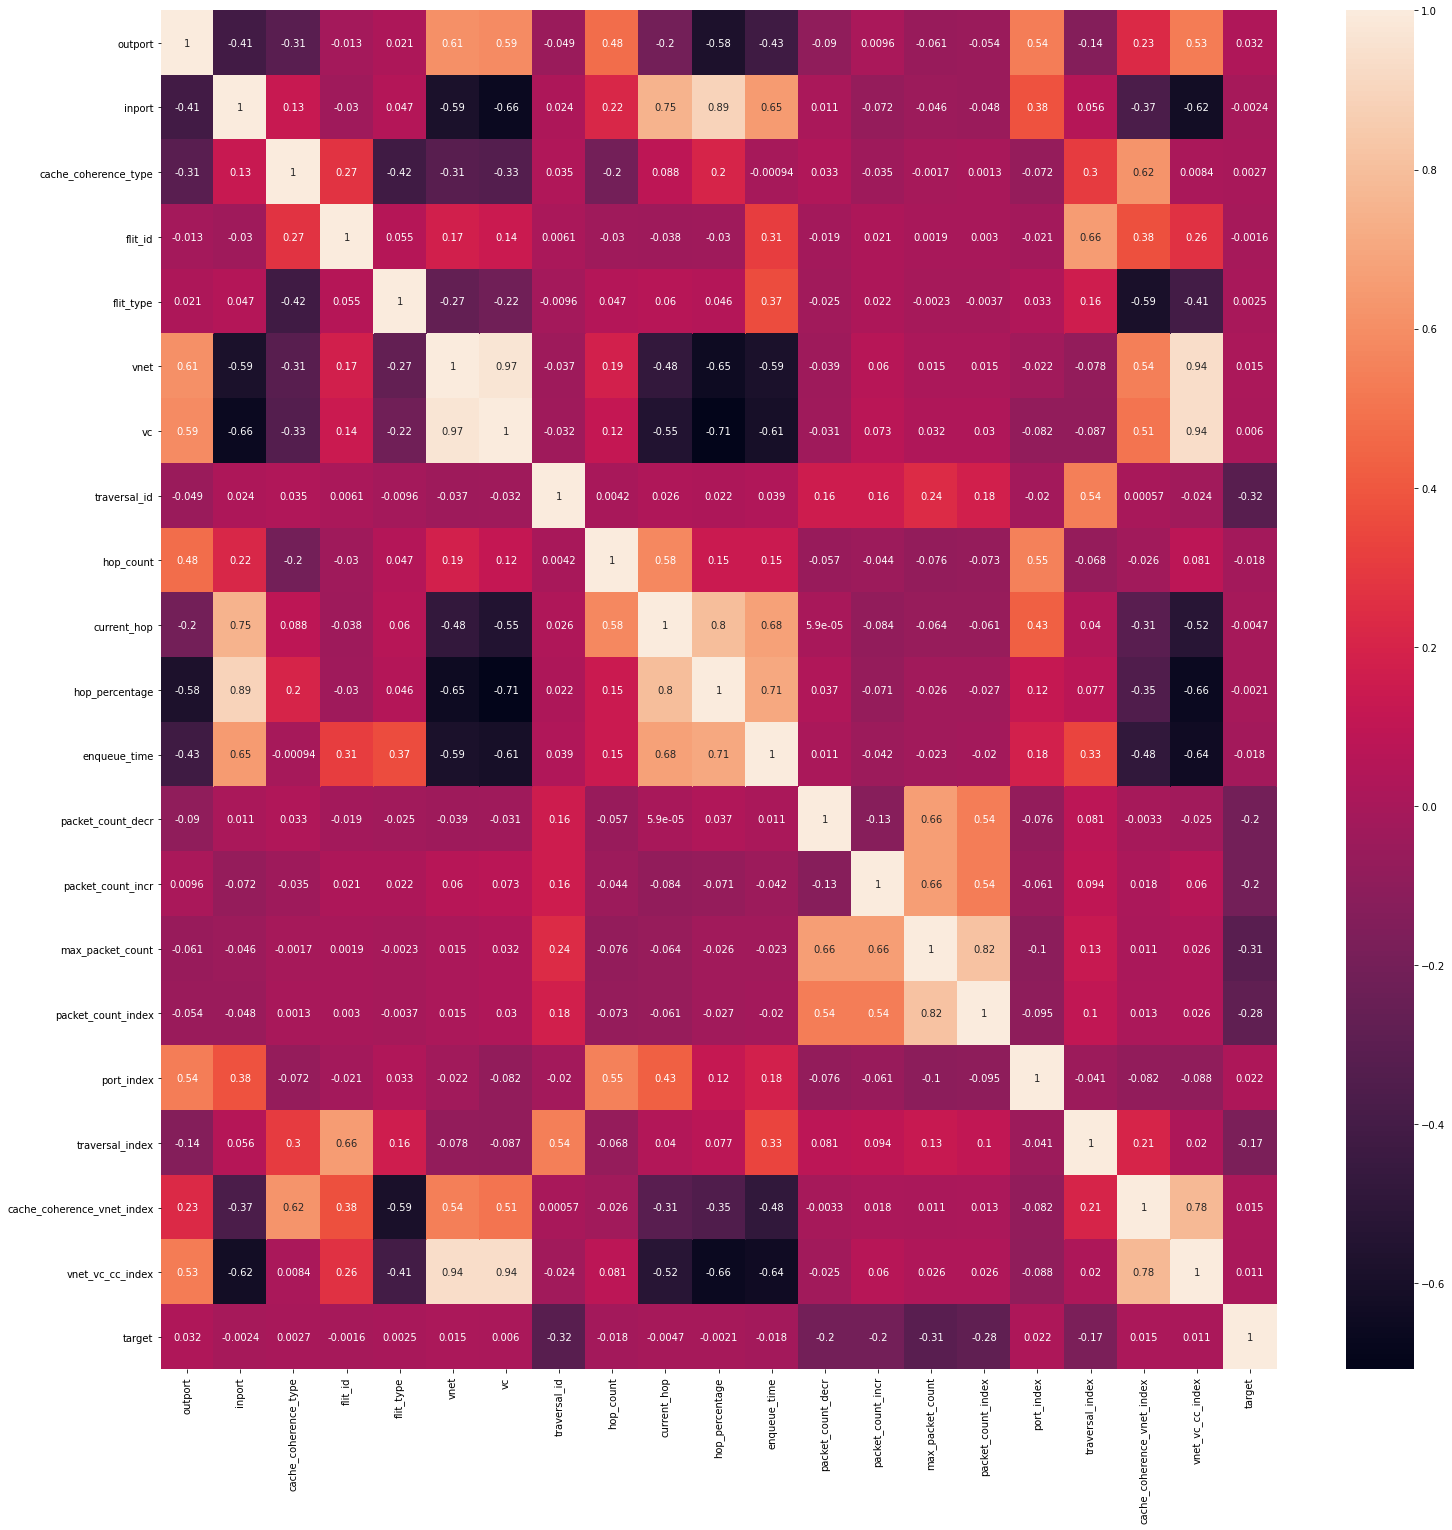

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

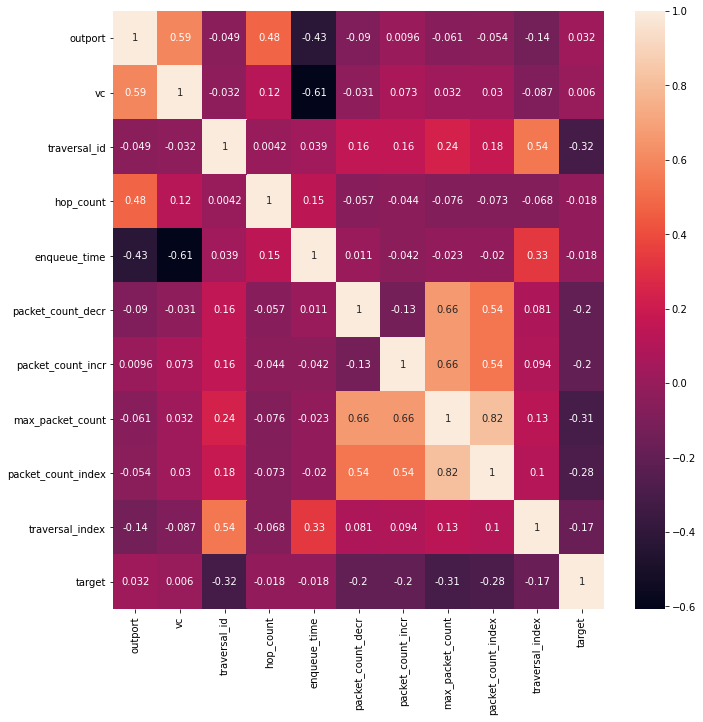

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

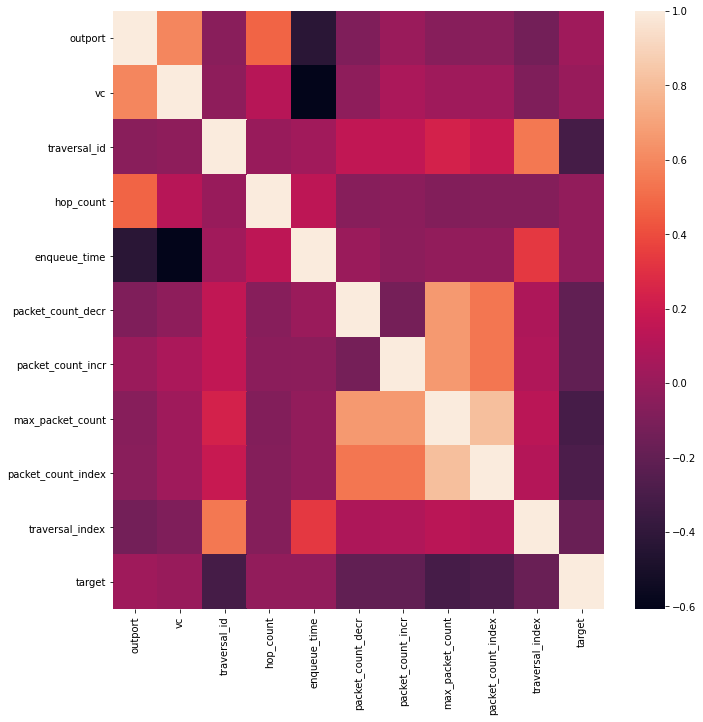

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.000000,0.000000,0.000000,0.500000,0.151899,0.190114,0.000000,0.190114,0.002848,0.000000e+00
1,0.000000,0.000000,0.000033,0.500000,0.151899,0.216730,0.000000,0.216730,0.003247,1.476442e-06
2,0.000000,0.000000,0.000050,0.500000,0.151899,0.212928,0.003802,0.216730,0.006437,2.214664e-06
3,0.000000,0.000000,0.000017,0.666667,0.202532,0.186312,0.003802,0.190114,0.005639,7.382212e-07
4,0.666667,0.727273,0.000000,0.500000,0.000000,0.182510,0.007605,0.190114,0.008317,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
211167,0.666667,0.909091,0.999784,0.666667,0.101266,0.000000,0.095057,0.095057,0.001424,6.666765e-01
211168,0.000000,0.000000,1.000000,0.500000,0.151899,0.011407,0.000000,0.011407,0.000171,6.667872e-02
211169,0.000000,0.000000,1.000000,0.500000,0.240506,0.007605,0.003802,0.011407,0.000285,2.667260e-01
211170,0.000000,0.000000,1.000000,0.500000,0.329114,0.003802,0.007605,0.011407,0.000285,4.000908e-01


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.000000,0.000000,0.000033,0.500000,0.160000,0.370079,0.000000,0.370079,0.005738,0.000001
1,0.000000,0.000000,0.000050,0.666667,0.213333,0.366142,0.003937,0.370079,0.011414,0.000002
2,0.666667,0.727273,0.000033,0.500000,0.000000,0.362205,0.007874,0.370079,0.016969,0.000001
3,0.666667,0.727273,0.000033,0.500000,0.013333,0.358268,0.011811,0.370079,0.022401,0.000017
4,0.666667,0.727273,0.000033,0.500000,0.026667,0.354331,0.015748,0.370079,0.027712,0.000027
...,...,...,...,...,...,...,...,...,...,...
148158,0.666667,0.909091,1.000000,0.666667,0.013333,0.015748,0.078740,0.094488,0.006348,0.177778
148159,0.666667,0.909091,1.000000,0.666667,0.026667,0.011811,0.082677,0.094488,0.005310,0.266668
148160,0.666667,0.909091,1.000000,0.666667,0.040000,0.007874,0.086614,0.094488,0.004151,0.355559
148161,0.666667,0.000000,1.000000,0.500000,0.053333,0.003937,0.090551,0.094488,0.002869,0.133332


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    125491
1     85681
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  2326.882649
8  packet_count_index  1664.244716
7    max_packet_count  1609.567200
6   packet_count_incr   807.867246
5   packet_count_decr   801.706827
9     traversal_index   790.791625
0             outport    46.958248
4        enqueue_time     8.410084
3           hop_count     6.846344
1                  vc     2.772585


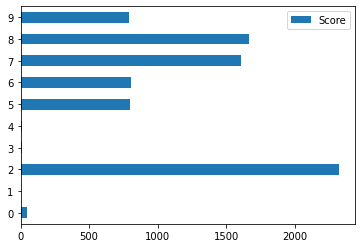

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.07612114358413
Test Prediction Score 97.70688937678477


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 84.17486147013761
Test Prediction Score 81.52151643542611
Test Prediction Score 83.12015567795771
Test Prediction Score 83.1760367635932
Test Prediction Score 81.71116136217894


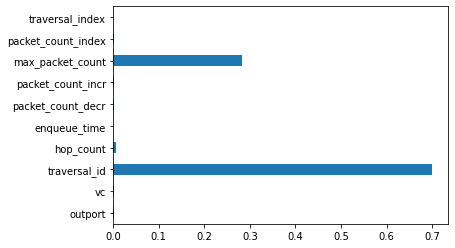

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

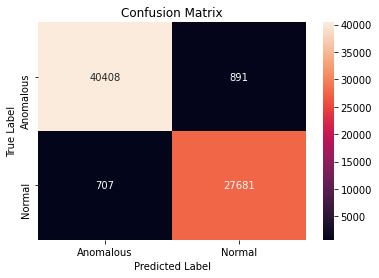

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     41299
           1       0.97      0.98      0.97     28388

    accuracy                           0.98     69687
   macro avg       0.98      0.98      0.98     69687
weighted avg       0.98      0.98      0.98     69687



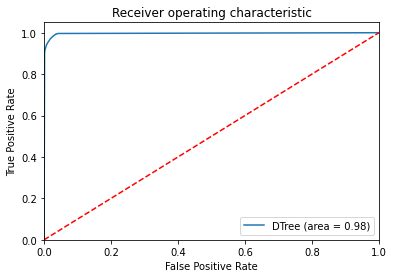

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r8l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.86511113981086


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.65406343014112
Test Prediction Score 82.2525261631004
Test Prediction Score 83.92559121343052
Test Prediction Score 83.96132495480214
Test Prediction Score 82.40237605049107


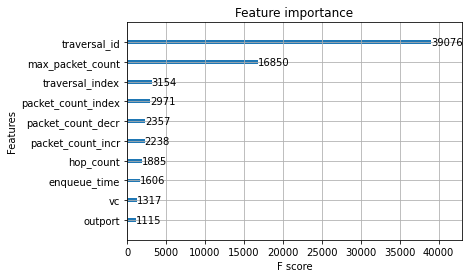

In [47]:
plot_importance(xgbc)
plt.show()

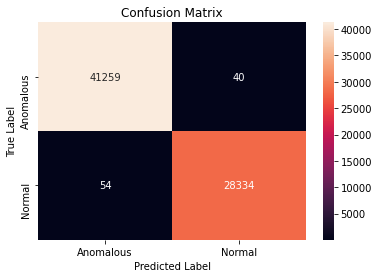

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41299
           1       1.00      1.00      1.00     28388

    accuracy                           1.00     69687
   macro avg       1.00      1.00      1.00     69687
weighted avg       1.00      1.00      1.00     69687



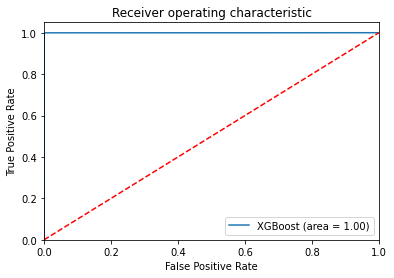

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()